In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs
!mkdir -p outputs1c

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.full((size, 1), 0.9)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.full((size, 1), 0.1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:09, 11.99it/s]                         


Epoch 1 of 100
Generator loss: 1.24830437, Discriminator loss: 0.92078114


118it [00:08, 13.24it/s]                         


Epoch 2 of 100
Generator loss: 1.78341818, Discriminator loss: 1.33570719


118it [00:09, 13.07it/s]                         


Epoch 3 of 100
Generator loss: 4.69814873, Discriminator loss: 0.65636384


118it [00:08, 13.20it/s]                         


Epoch 4 of 100
Generator loss: 3.12177014, Discriminator loss: 0.93810141


118it [00:09, 13.08it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


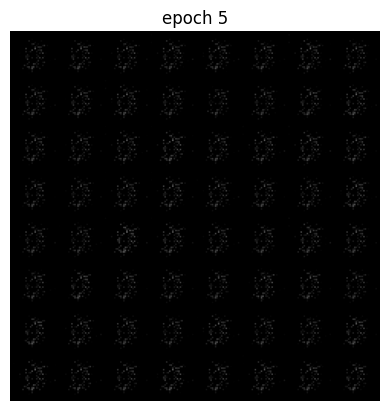

Epoch 5 of 100
Generator loss: 3.15198970, Discriminator loss: 0.98002207


118it [00:09, 12.04it/s]                         


Epoch 6 of 100
Generator loss: 1.45116258, Discriminator loss: 1.05158961


118it [00:09, 12.96it/s]                         


Epoch 7 of 100
Generator loss: 1.35959983, Discriminator loss: 1.15481055


118it [00:09, 12.15it/s]                         


Epoch 8 of 100
Generator loss: 1.73268175, Discriminator loss: 1.09943020


118it [00:08, 13.15it/s]                         


Epoch 9 of 100
Generator loss: 1.82019603, Discriminator loss: 1.04477954


118it [00:08, 13.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


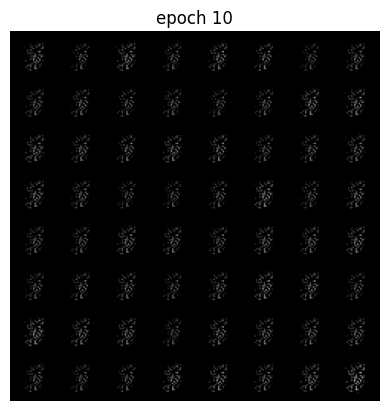

Epoch 10 of 100
Generator loss: 1.74700367, Discriminator loss: 1.20097601


118it [00:08, 13.32it/s]                         


Epoch 11 of 100
Generator loss: 2.22161746, Discriminator loss: 1.24034333


118it [00:08, 13.30it/s]                         


Epoch 12 of 100
Generator loss: 1.24832845, Discriminator loss: 1.30952775


118it [00:09, 13.08it/s]                         


Epoch 13 of 100
Generator loss: 1.70962524, Discriminator loss: 0.99854326


118it [00:09, 12.55it/s]                         


Epoch 14 of 100
Generator loss: 1.24209881, Discriminator loss: 1.47430706


118it [00:09, 13.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


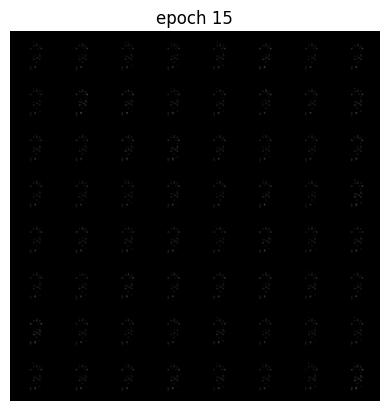

Epoch 15 of 100
Generator loss: 0.96722490, Discriminator loss: 1.16053104


118it [00:08, 13.25it/s]                         


Epoch 16 of 100
Generator loss: 1.76964247, Discriminator loss: 0.92732495


118it [00:08, 13.17it/s]                         


Epoch 17 of 100
Generator loss: 2.70676446, Discriminator loss: 0.89824289


118it [00:08, 13.37it/s]                         


Epoch 18 of 100
Generator loss: 2.10674620, Discriminator loss: 0.81510580


118it [00:08, 13.21it/s]                         


Epoch 19 of 100
Generator loss: 2.37790442, Discriminator loss: 0.61016291


118it [00:08, 13.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


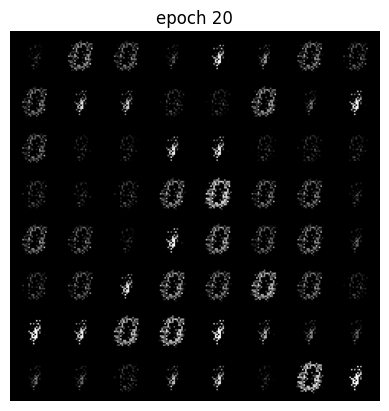

Epoch 20 of 100
Generator loss: 2.82648277, Discriminator loss: 0.80303866


118it [00:10, 11.60it/s]                         


Epoch 21 of 100
Generator loss: 2.59655190, Discriminator loss: 0.67287010


118it [00:09, 12.92it/s]                         


Epoch 22 of 100
Generator loss: 2.61403823, Discriminator loss: 0.55912828


118it [00:08, 13.31it/s]                         


Epoch 23 of 100
Generator loss: 2.60564375, Discriminator loss: 0.66254771


118it [00:08, 13.26it/s]                         


Epoch 24 of 100
Generator loss: 2.45176458, Discriminator loss: 0.64994067


118it [00:09, 12.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


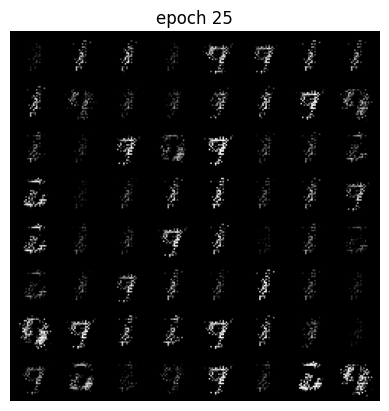

Epoch 25 of 100
Generator loss: 2.35815477, Discriminator loss: 0.68349707


118it [00:09, 12.50it/s]                         


Epoch 26 of 100
Generator loss: 2.85210085, Discriminator loss: 0.64445817


118it [00:09, 11.99it/s]                         


Epoch 27 of 100
Generator loss: 2.54304814, Discriminator loss: 0.50177616


118it [00:08, 13.20it/s]                         


Epoch 28 of 100
Generator loss: 3.36156058, Discriminator loss: 0.45175037


118it [00:09, 13.09it/s]                         


Epoch 29 of 100
Generator loss: 2.51732516, Discriminator loss: 0.63863146


118it [00:08, 13.16it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


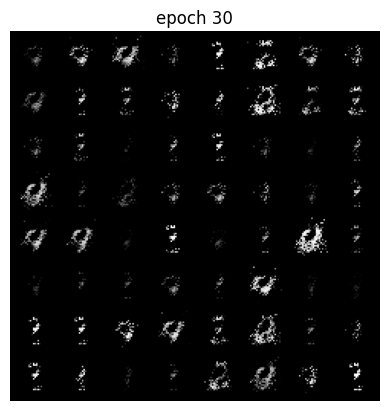

Epoch 30 of 100
Generator loss: 3.27854943, Discriminator loss: 0.49414957


118it [00:09, 13.10it/s]                         


Epoch 31 of 100
Generator loss: 3.00916839, Discriminator loss: 0.49907243


118it [00:09, 12.96it/s]                         


Epoch 32 of 100
Generator loss: 2.93306541, Discriminator loss: 0.58922869


118it [00:09, 12.27it/s]                         


Epoch 33 of 100
Generator loss: 2.84976482, Discriminator loss: 0.51912540


118it [00:10, 11.80it/s]                         


Epoch 34 of 100
Generator loss: 3.53100395, Discriminator loss: 0.39999524


118it [00:09, 12.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


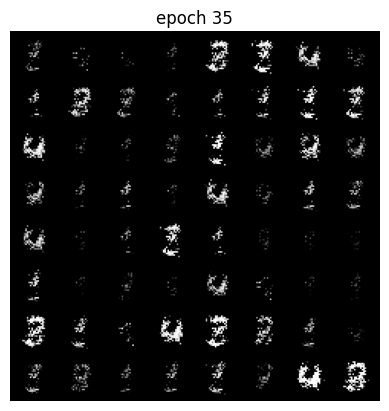

Epoch 35 of 100
Generator loss: 3.13799381, Discriminator loss: 0.50199586


118it [00:09, 12.76it/s]                         


Epoch 36 of 100
Generator loss: 3.34017611, Discriminator loss: 0.41457701


118it [00:09, 13.02it/s]                         


Epoch 37 of 100
Generator loss: 3.14639592, Discriminator loss: 0.50857258


118it [00:08, 13.13it/s]                         


Epoch 38 of 100
Generator loss: 3.13567019, Discriminator loss: 0.45070013


118it [00:08, 13.26it/s]                         


Epoch 39 of 100
Generator loss: 3.47226739, Discriminator loss: 0.38454115


118it [00:09, 12.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


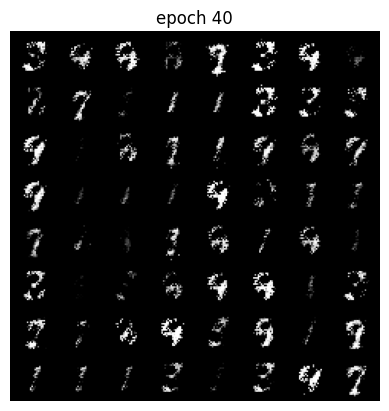

Epoch 40 of 100
Generator loss: 3.05436397, Discriminator loss: 0.53035545


118it [00:09, 13.09it/s]                         


Epoch 41 of 100
Generator loss: 2.82366061, Discriminator loss: 0.52430868


118it [00:08, 13.25it/s]                         


Epoch 42 of 100
Generator loss: 2.88763142, Discriminator loss: 0.51493222


118it [00:08, 13.17it/s]                         


Epoch 43 of 100
Generator loss: 2.93893790, Discriminator loss: 0.48564279


118it [00:09, 11.97it/s]                         


Epoch 44 of 100
Generator loss: 3.04401374, Discriminator loss: 0.44461364


118it [00:09, 12.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


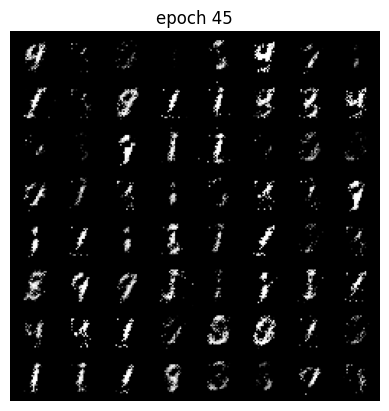

Epoch 45 of 100
Generator loss: 3.12640858, Discriminator loss: 0.44555897


118it [00:09, 12.81it/s]                         


Epoch 46 of 100
Generator loss: 3.25199461, Discriminator loss: 0.50050366


118it [00:10, 11.36it/s]                         


Epoch 47 of 100
Generator loss: 3.43258142, Discriminator loss: 0.36199236


118it [00:09, 12.89it/s]                         


Epoch 48 of 100
Generator loss: 3.61128569, Discriminator loss: 0.42939946


118it [00:08, 13.34it/s]                         


Epoch 49 of 100
Generator loss: 3.16138625, Discriminator loss: 0.49616170


118it [00:08, 13.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


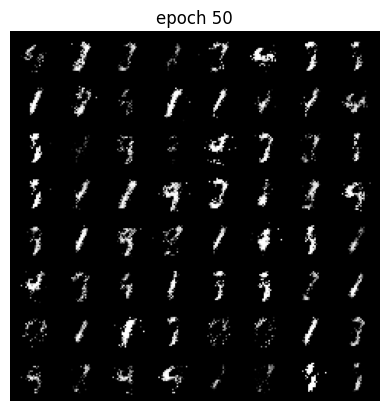

Epoch 50 of 100
Generator loss: 2.92156720, Discriminator loss: 0.56251115


118it [00:09, 12.66it/s]                         


Epoch 51 of 100
Generator loss: 2.83043933, Discriminator loss: 0.53138047


118it [00:09, 12.62it/s]                         


Epoch 52 of 100
Generator loss: 3.09195018, Discriminator loss: 0.47536924


118it [00:09, 12.33it/s]                         


Epoch 53 of 100
Generator loss: 3.02453423, Discriminator loss: 0.46604097


118it [00:08, 13.44it/s]                         


Epoch 54 of 100
Generator loss: 2.98119640, Discriminator loss: 0.52252454


118it [00:09, 12.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


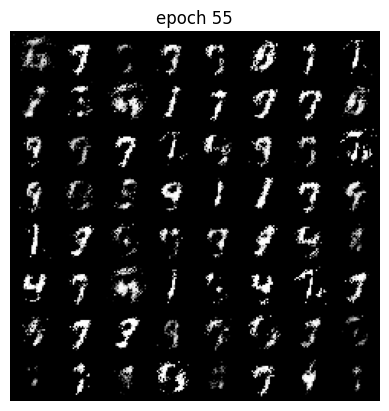

Epoch 55 of 100
Generator loss: 2.76145196, Discriminator loss: 0.57335913


118it [00:08, 13.27it/s]                         


Epoch 56 of 100
Generator loss: 2.78795099, Discriminator loss: 0.54197145


118it [00:08, 13.56it/s]                         


Epoch 57 of 100
Generator loss: 2.81924820, Discriminator loss: 0.52966797


118it [00:08, 13.46it/s]                         


Epoch 58 of 100
Generator loss: 2.88293481, Discriminator loss: 0.53750634


118it [00:08, 13.38it/s]                         


Epoch 59 of 100
Generator loss: 2.70295238, Discriminator loss: 0.54427975


118it [00:09, 12.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


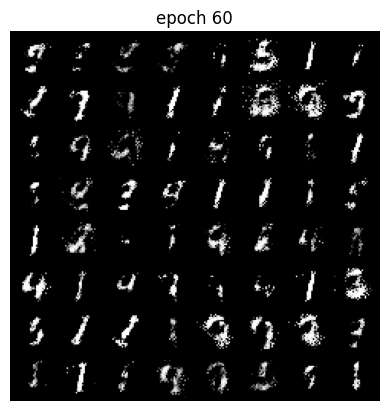

Epoch 60 of 100
Generator loss: 2.65748477, Discriminator loss: 0.53365755


118it [00:08, 13.40it/s]                         


Epoch 61 of 100
Generator loss: 2.75220466, Discriminator loss: 0.53833234


118it [00:08, 13.43it/s]                         


Epoch 62 of 100
Generator loss: 2.57155871, Discriminator loss: 0.59576488


118it [00:08, 13.50it/s]                         


Epoch 63 of 100
Generator loss: 2.43061447, Discriminator loss: 0.61806959


118it [00:09, 12.74it/s]                         


Epoch 64 of 100
Generator loss: 2.62335825, Discriminator loss: 0.54809350


118it [00:08, 13.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


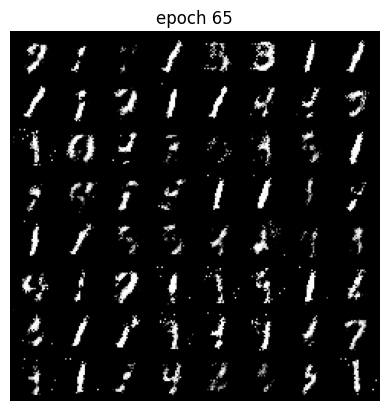

Epoch 65 of 100
Generator loss: 2.58433604, Discriminator loss: 0.58129323


118it [00:09, 12.24it/s]                         


Epoch 66 of 100
Generator loss: 2.62493300, Discriminator loss: 0.57184678


118it [00:09, 12.75it/s]                         


Epoch 67 of 100
Generator loss: 2.56129789, Discriminator loss: 0.61005116


118it [00:08, 13.31it/s]                         


Epoch 68 of 100
Generator loss: 2.62157655, Discriminator loss: 0.59210211


118it [00:08, 13.39it/s]                         


Epoch 69 of 100
Generator loss: 2.61088157, Discriminator loss: 0.53996402


118it [00:09, 12.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


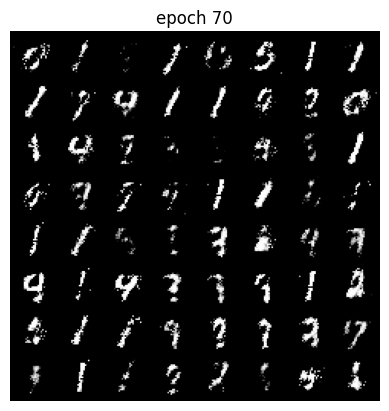

Epoch 70 of 100
Generator loss: 2.55289316, Discriminator loss: 0.57039499


118it [00:08, 13.51it/s]                         


Epoch 71 of 100
Generator loss: 2.71229649, Discriminator loss: 0.57162505


118it [00:08, 13.52it/s]                         


Epoch 72 of 100
Generator loss: 2.58938575, Discriminator loss: 0.57820123


118it [00:10, 11.23it/s]                         


Epoch 73 of 100
Generator loss: 2.49476504, Discriminator loss: 0.59195018


118it [00:08, 13.16it/s]                         


Epoch 74 of 100
Generator loss: 2.45548153, Discriminator loss: 0.61811399


118it [00:08, 13.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


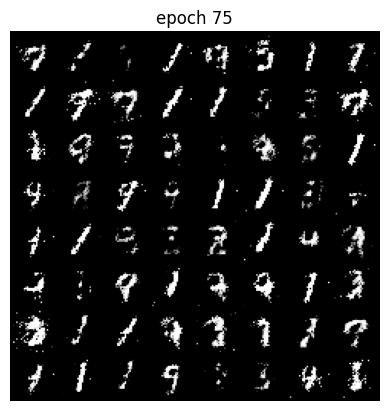

Epoch 75 of 100
Generator loss: 2.54165983, Discriminator loss: 0.59826529


118it [00:08, 13.38it/s]                         


Epoch 76 of 100
Generator loss: 2.54910493, Discriminator loss: 0.61301237


118it [00:08, 13.54it/s]                         


Epoch 77 of 100
Generator loss: 2.32544756, Discriminator loss: 0.66335273


118it [00:08, 13.48it/s]                         


Epoch 78 of 100
Generator loss: 2.46116304, Discriminator loss: 0.63022822


118it [00:08, 13.62it/s]                         


Epoch 79 of 100
Generator loss: 2.40016556, Discriminator loss: 0.61360472


118it [00:09, 12.45it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


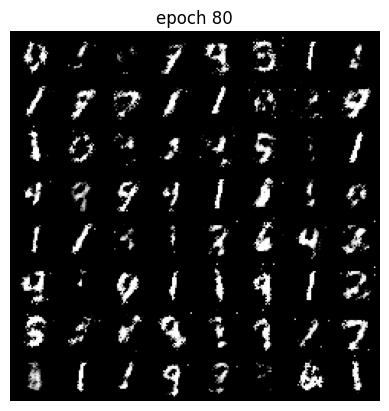

Epoch 80 of 100
Generator loss: 2.43784475, Discriminator loss: 0.63411665


118it [00:09, 12.11it/s]                         


Epoch 81 of 100
Generator loss: 2.43160272, Discriminator loss: 0.63941491


118it [00:08, 13.65it/s]                         


Epoch 82 of 100
Generator loss: 2.34889889, Discriminator loss: 0.68687034


118it [00:08, 13.36it/s]                         


Epoch 83 of 100
Generator loss: 2.24246049, Discriminator loss: 0.66684937


118it [00:08, 13.58it/s]                         


Epoch 84 of 100
Generator loss: 2.21122336, Discriminator loss: 0.69836277


118it [00:09, 12.31it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


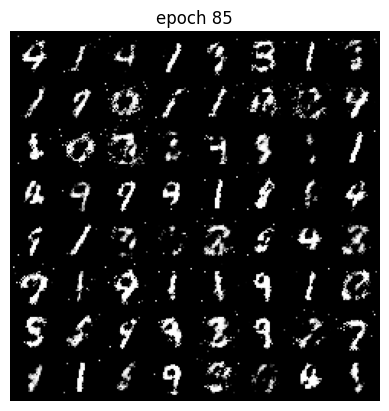

Epoch 85 of 100
Generator loss: 2.29801917, Discriminator loss: 0.70599908


118it [00:09, 12.13it/s]                         


Epoch 86 of 100
Generator loss: 2.10088205, Discriminator loss: 0.74831879


118it [00:08, 13.49it/s]                         


Epoch 87 of 100
Generator loss: 2.23869252, Discriminator loss: 0.69417691


118it [00:08, 13.52it/s]                         


Epoch 88 of 100
Generator loss: 2.22107220, Discriminator loss: 0.70816302


118it [00:08, 13.37it/s]                         


Epoch 89 of 100
Generator loss: 2.13507104, Discriminator loss: 0.72294956


118it [00:08, 13.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


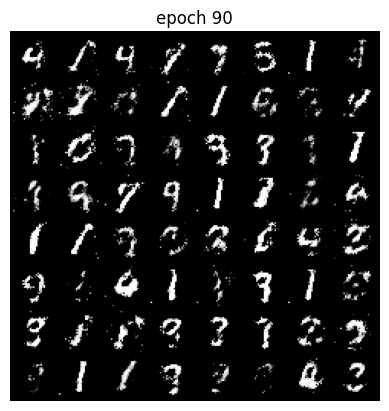

Epoch 90 of 100
Generator loss: 2.05475998, Discriminator loss: 0.75096679


118it [00:08, 13.49it/s]                         


Epoch 91 of 100
Generator loss: 1.98634255, Discriminator loss: 0.77414453


118it [00:09, 12.89it/s]                         


Epoch 92 of 100
Generator loss: 2.10303092, Discriminator loss: 0.77695340


118it [00:09, 12.53it/s]                         


Epoch 93 of 100
Generator loss: 2.06962204, Discriminator loss: 0.79209197


118it [00:08, 13.50it/s]                         


Epoch 94 of 100
Generator loss: 1.97885919, Discriminator loss: 0.77179486


118it [00:08, 13.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


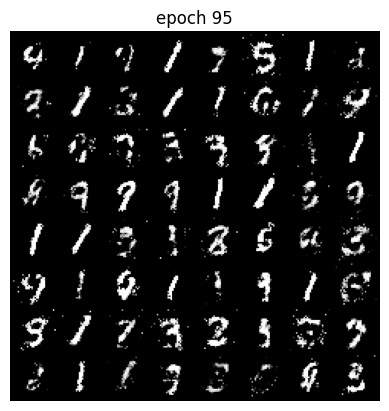

Epoch 95 of 100
Generator loss: 2.13543320, Discriminator loss: 0.71457183


118it [00:08, 13.43it/s]                         


Epoch 96 of 100
Generator loss: 2.10773754, Discriminator loss: 0.74587506


118it [00:08, 13.28it/s]                         


Epoch 97 of 100
Generator loss: 2.03529334, Discriminator loss: 0.78047824


118it [00:08, 13.53it/s]                         


Epoch 98 of 100
Generator loss: 1.96742475, Discriminator loss: 0.77377450


118it [00:08, 13.20it/s]                         


Epoch 99 of 100
Generator loss: 1.93923032, Discriminator loss: 0.77300185


118it [00:09, 12.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


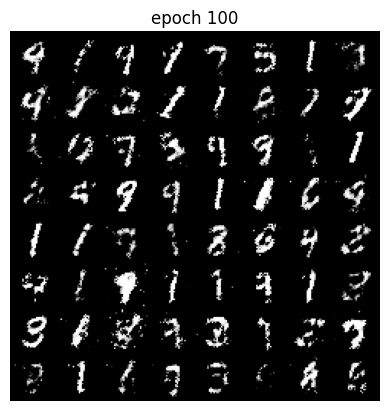

Epoch 100 of 100
Generator loss: 1.97156811, Discriminator loss: 0.77775156


In [14]:
torch.manual_seed(7777)

def add_noise(img, mean=0, std=0.1):
    noise = torch.randn_like(img) * std + mean
    noisy_img = img + noise
    return noisy_img


def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_images, _ = data
        real_images = real_images.to(device)
        size_of_batch = real_images.size(0)

        noisy_images = add_noise(real_images)

        # train discriminator with real data
        optim_d.zero_grad()
        real_label = label_real(size_of_batch)
        real_output = discriminator(noisy_images)
        real_loss = discriminator_loss(real_output, real_label)

        #train discriminator with fake data
        fake_label = label_fake(size_of_batch)
        fake_images = generator(create_noise(size_of_batch, nz)).detach()
        fake_output = discriminator(fake_images)
        fake_loss = discriminator_loss(fake_output, fake_label)
        
        real_loss.backward()
        fake_loss.backward()
        optim_d.step()
        loss_d += (real_loss + fake_loss)
        
        # train generator
        optim_g.zero_grad()
        fake_images = generator(create_noise(size_of_batch, nz))
        g_output = discriminator(fake_images)
        g_loss = generator_loss(g_output, real_label)

        g_loss.backward()
        optim_g.step()
        loss_g += g_loss
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs1c/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs1c/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs1c/generator_images.gif', imgs)

#reformat data
losses_g_np = [tensor.detach().numpy() for tensor in losses_g]
losses_d_np = [tensor.detach().numpy() for tensor in losses_d]
print(losses_g)
print(losses_d)
print(losses_g_np)
print(losses_d_np)


[tensor(1.2483, grad_fn=<DivBackward0>), tensor(1.7834, grad_fn=<DivBackward0>), tensor(4.6981, grad_fn=<DivBackward0>), tensor(3.1218, grad_fn=<DivBackward0>), tensor(3.1520, grad_fn=<DivBackward0>), tensor(1.4512, grad_fn=<DivBackward0>), tensor(1.3596, grad_fn=<DivBackward0>), tensor(1.7327, grad_fn=<DivBackward0>), tensor(1.8202, grad_fn=<DivBackward0>), tensor(1.7470, grad_fn=<DivBackward0>), tensor(2.2216, grad_fn=<DivBackward0>), tensor(1.2483, grad_fn=<DivBackward0>), tensor(1.7096, grad_fn=<DivBackward0>), tensor(1.2421, grad_fn=<DivBackward0>), tensor(0.9672, grad_fn=<DivBackward0>), tensor(1.7696, grad_fn=<DivBackward0>), tensor(2.7068, grad_fn=<DivBackward0>), tensor(2.1067, grad_fn=<DivBackward0>), tensor(2.3779, grad_fn=<DivBackward0>), tensor(2.8265, grad_fn=<DivBackward0>), tensor(2.5966, grad_fn=<DivBackward0>), tensor(2.6140, grad_fn=<DivBackward0>), tensor(2.6056, grad_fn=<DivBackward0>), tensor(2.4518, grad_fn=<DivBackward0>), tensor(2.3582, grad_fn=<DivBackward0>),

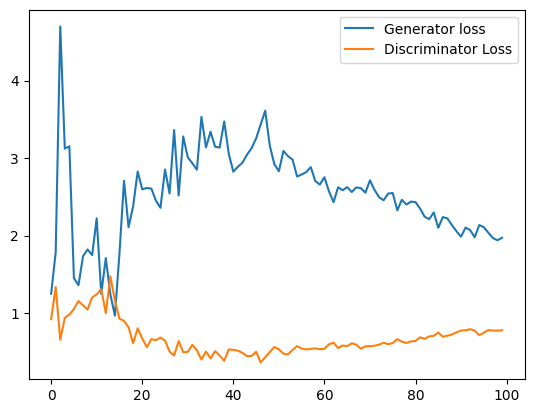

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g_np, label='Generator loss')
plt.plot(losses_d_np, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs1c/loss.png')